# Feature Interaction

## Main Concept: Friedman’s H-statistic

{cite:p}`friedman2008predictive`

A function $F(\mathbf{x})$ is said to exhibit an interaction between two of its variables $x_j$ and $x_k$ if the difference in the value of $F(x)$ as a result of changing the value of $x_j$ depends on the value of $x_k$.

$$\Bbb{E}_{\mathbf{x}} = \Big\lbrack \dfrac{\partial^2 F(\mathbf{x})}{\partial x_j \partial x_k} \Big\rbrack^2 > 0$$

If there is no interaction between these($x_j, x_k$) variables, we can decompose the function $F(x)$ as follows:

$$F(\mathbf{x})=f_{\setminus j}(\mathbf{x}_{\setminus j})+f_{\setminus k}(\mathbf{x}_{\setminus k})$$

- $\mathbf{x}_{\setminus i}$: all variables except $x_i$

If a given variable $x_j$ interacts with **none** of the other variables($\mathbf{x}_{\setminus j}$), then the function will be:

$$F(\mathbf{x})=f_j(x_j) + f_{\setminus j}(\mathbf{x}_{\setminus j})$$

In this case $F(x)$ is said to be **additive** in $x_j$.

Here, let us the properties of centered partial dependence function to study interaction effects in the predictive model. We can setimated the dependence of predictive models on low cardinality subsets of the variables from the data:

$$\hat{F}_s(\mathbf{x}_s) = \dfrac{1}{N} \sum_{i=1}^{N} F(\mathbf{x}_s, \mathbf{x}_{\setminus s}) $$

If two variables $x_j$ and $x_k$ do not interact, the partial dependence of $F(\mathbf{x})$ on $\mathbf{x}_s = (x_j , x_k)$ can be decomposed into the sum of the respective partial dependences on each variable separately:

$$F_{jk}(x_j,x_k)=F_j(x_j)+F_k(x_k)$$

- $F_{jk}(x_j,x_k)$: the 2-way partial dependence function of both features
- $F_j(x_j), F_k(x_k)$: the partial dependence functions of the single feature

If the variable $x_j$ does not interact with any other variable, then the predict function $F(\mathbf{x})$ can be write as:

$$F(\mathbf{x})=F_j(x_j)+F_{\setminus j}(x_{\setminus j})$$

- $F_{\setminus j}(x_{\setminus j})$: the partial dependence without feature $j$

To test for the presence of an interaction between two features $x_j, x_k$, the statistic will be as follows:

$$H^2_{jk} = \frac{\sum_{i=1}^N\left[ \hat{F}_{jk}(x_{j}^{(i)},x_k^{(i)})-\hat{F}_j(x_j^{(i)}) - \hat{F}_k(x_{k}^{(i)})\right]^2}{\sum_{i=1}^N {\hat{F}}^2_{jk}(x_j^{(i)},x_k^{(i)})}$$

It measures the fraction of variance of $\hat{F}_{jk}(x_j, x_k)$ without the variance of $j$ ($\hat{F}_j(x_j)$) and $k$ ($\hat{F}_k(x_k)$) over the
data distribution $\sum_{i=1}^N {\hat{F}}^2_{jk}(x_j^{(i)},x_k^{(i)})$.

Similarly, a statistic for a specific variable $x_j$ interacts with any other variable:

$$H^2_{j}=\frac{\sum_{i=1}^N\left[F(x^{(i)})-\hat{F}_j(x_{j}^{(i)})-\hat{F}_{\setminus j}(x_{\setminus j}^{(i)})\right]^2}{\sum_{i=1}^N F^2(x^{(i)})}$$

It measures the fraction of variance of vairable $j$ over the data distribution.

- $H^2_{j} = 0$: no interaction at all
- $H^2_{j} = 1$: all of the variance of the $PD_{jk}$ or $\hat{f}$ is explained by the sum of the partial dependence functions

## Example

In [6]:
import sys
from pathlib import Path

main_path = str(Path().absolute().parent)
sys.path.append(main_path)

import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
from src.CLhousing import load_model
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

In [2]:
ds, model = load_model(seed=0)

The mean squared error (MSE) on test set is 0.2080
The R2 Score on test set is 0.8486


/home/simonjisu/miniconda3/lib/python3.8/site-packages/sklearn/inspection/_plot/partial_dependence.py:1162: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(XX, YY, Z, levels=Z_level, linewidths=0.5, colors="k")


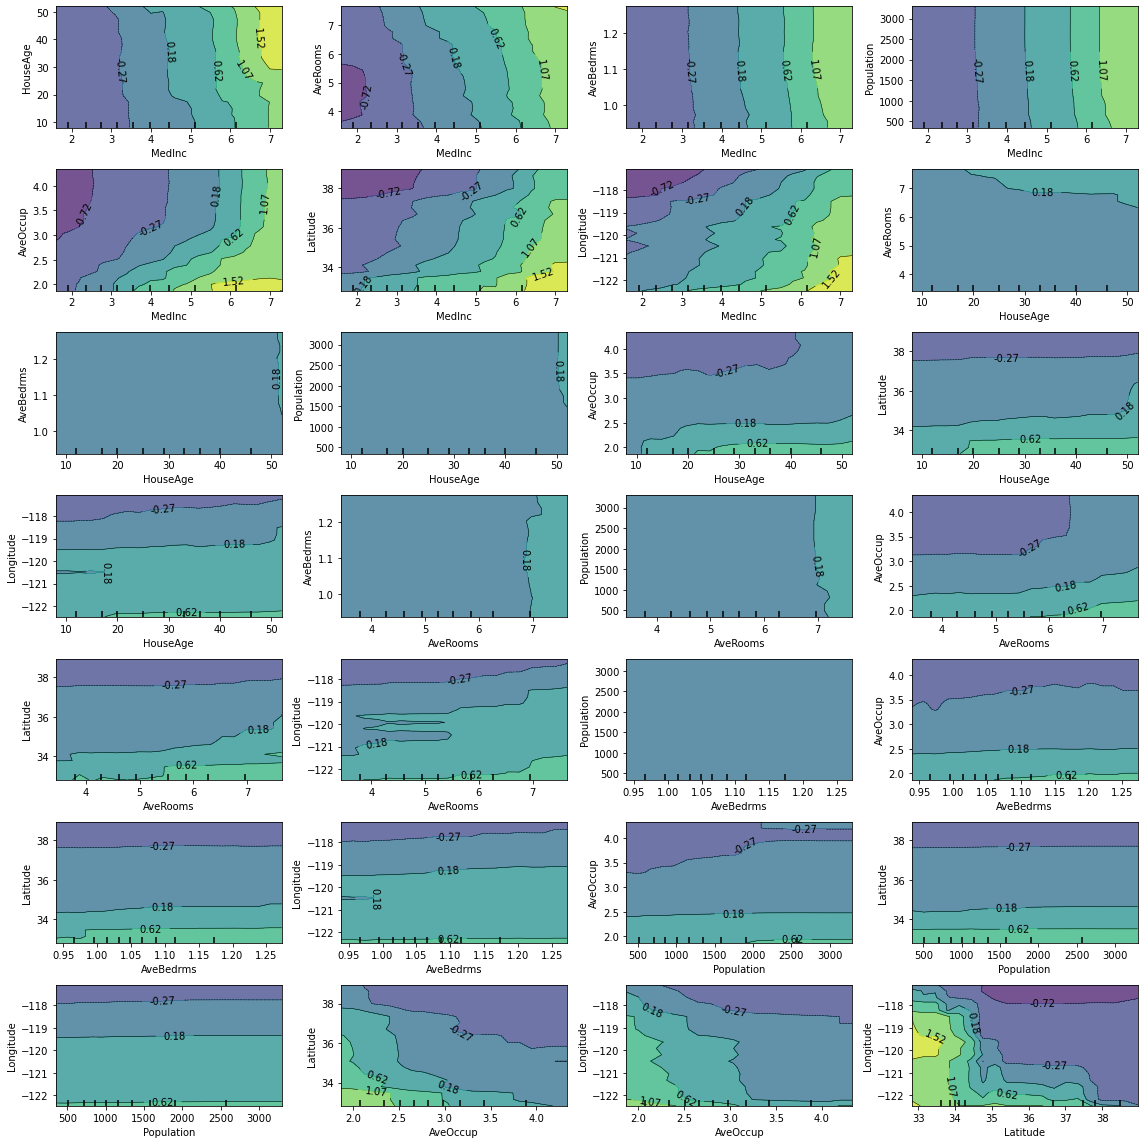

In [3]:
from itertools import combinations

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
two_way_features = list(combinations(features, 2))
fig, axes = plt.subplots(len(two_way_features) // 4, 4, figsize=(16, 16))

display = PartialDependenceDisplay.from_estimator(
    model,
    ds.X_train,
    two_way_features,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ax = axes.flatten()
)
plt.tight_layout()
plt.show()

# References

## Feature Interaction

- https://christophm.github.io/interpretable-ml-book/interaction.html
- [Predictive learning via rule ensembles](https://arxiv.org/abs/0811.1679)